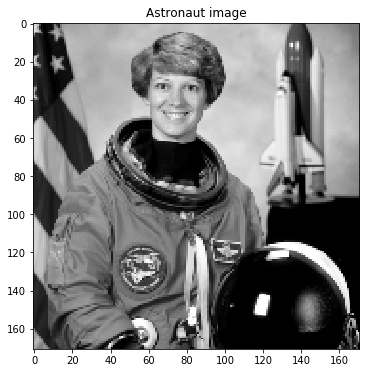

In [1]:
%matplotlib inline
from skimage import color, data
from skimage.transform import rescale
import matplotlib.pyplot as plt

astro_org = rescale(color.rgb2gray(data.astronaut()), 1.0/3.0, mode='constant')

plt.figure(figsize=(6, 6))
plt.gray()
plt.imshow(astro_org)
plt.title('Astronaut image');

In [2]:
import numpy as np
import tensorflow as tf
import scipy.ndimage.filters as fi


def gaussian(kernlen, nsig_x, nsig_y):
    inp = np.zeros((kernlen, kernlen))
    inp[kernlen//2, kernlen//2] = 1
    kern = fi.gaussian_filter(inp, (nsig_x, nsig_y))
    scaled_kern = kern / np.sum(kern)
    return scaled_kern


def tf_convolve_2d(image, psf):
    tf_image = tf.reshape(image, (1, tf.shape(image)[0], tf.shape(image)[1], 1))
    tf_psf = tf.reshape(psf, (tf.shape(psf)[0], tf.shape(psf)[1], 1, 1))
    tf_output = tf.nn.conv2d(tf_image, tf_psf, [1, 1, 1, 1], 'SAME')[0, :, :, 0]
    return tf_output


def convolve(image, psf):
    sess = tf.Session()
    tf_image = tf.constant(image, dtype=tf.float32)
    tf_psf = tf.constant(psf, dtype=tf.float32)
    tf_output = tf_convolve_2d(tf_image, tf_psf)
    output = sess.run(tf_output)
    return output

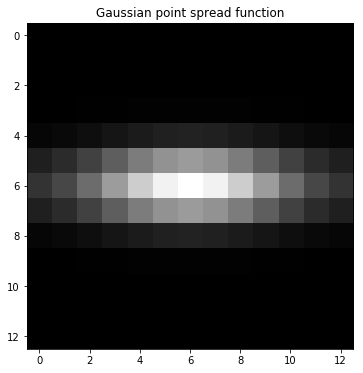

In [3]:
psf = gaussian(kernlen=13, nsig_x=1, nsig_y=3)

plt.figure(figsize=(6, 6))
plt.imshow(psf)
plt.title('Gaussian point spread function');

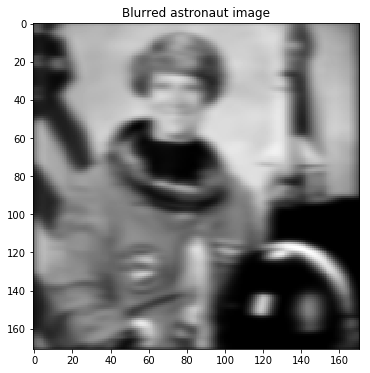

In [4]:
astro_blur = convolve(astro_org, psf)

plt.figure(figsize=(6, 6))
plt.imshow(astro_blur)
plt.title('Blurred astronaut image');

loss: 64.15282440185547
loss: 56.18058395385742
loss: 56.1402702331543
loss: 56.09885787963867
loss: 56.05619812011719
loss: 56.012271881103516
loss: 55.96706008911133
loss: 55.920467376708984
loss: 55.8725700378418
loss: 57.19341278076172
loss: 57.11206817626953
loss: 57.02783203125
loss: 56.940547943115234
loss: 56.85000991821289
loss: 56.75593948364258
loss: 56.658203125
loss: 56.55644607543945
loss: 56.450557708740234
loss: 55.1374626159668
loss: 55.06023025512695
loss: 54.97967529296875
loss: 54.89551544189453
loss: 54.80756378173828
loss: 54.71553039550781
loss: 55.71196365356445
loss: 55.563751220703125
loss: 55.407691955566406
loss: 55.24249267578125
loss: 54.0825080871582
loss: 53.95109939575195
loss: 53.81190490722656
loss: 54.57090759277344
loss: 53.4766845703125
loss: 54.14578628540039
loss: 53.88719940185547
loss: 52.84943771362305
loss: 52.6282844543457
loss: 53.063133239746094
loss: 52.692623138427734
loss: 52.27732467651367
loss: 51.34381866455078
loss: 50.9761848449707

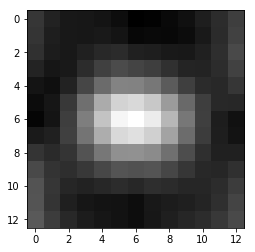

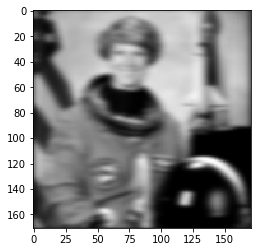

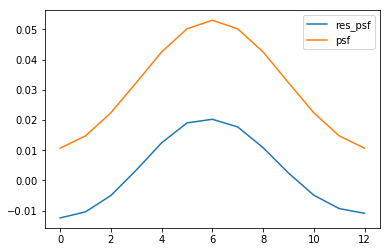

In [5]:
from src.loss_net.blind_deconvolution import BlindDeconvolution


for learning_rate in [1e-4,]:
    blind_deconvolution = BlindDeconvolution(psf.shape, learning_rate)
    res_psf = blind_deconvolution.fit(astro_blur, astro_org)

    print(learning_rate)
    print(np.sum(np.abs(res_psf - psf)))
plt.imshow(res_psf)
plt.figure()
plt.imshow(astro_blur)
plt.figure()
plt.plot(res_psf[6, :], label='res_psf')
plt.plot(psf[6, :], label='psf')
plt.legend()